### Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Import the Data

In [2]:
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

### Settings

In [3]:
# Set ipython's max row display
pd.set_option('display.max_row', 100)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 35)

### Check the Data

In [4]:
#data.head()
#data.tail()
#data.columns

### Report the Total Number of Crimes in the Dataset

In [5]:
ttl_num = len(data)
print(ttl_num)

2160953


### Various Categories of Crime

In [6]:
cat_of_crm = sorted(data['Category'].unique())
print(cat_of_crm)

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES, FORCIBLE', 'SEX OFFENSES, NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']


### Number of Crimes in each Category

In [7]:
num_cri_cat = data['Category'].value_counts()
print(num_cri_cat)

LARCENY/THEFT                  477975
OTHER OFFENSES                 303027
NON-CRIMINAL                   236937
ASSAULT                        191384
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117875
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79740
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
SEX OFFENSES, FORCIBLE          10876
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4966
LIQUOR LAWS                      3941
ARSON       

### Count all the Different Categories of Crime

In [8]:
count_cat = len(cat_of_crm)
print(count_cat)

38


### Most Commonly Occuring Category of Crime

In [9]:
max_value = num_cri_cat.max()
print(max_value)

477975


### Least Frequentle Occuring Category of Crime

In [10]:
min_value = num_cri_cat.min()
print(min_value)

14


### Creating a DataFrame

In [11]:
col = ['Category', 'Occurences']

cri_occ = pd.DataFrame(num_cri_cat.reset_index())
cri_occ.columns = col

### Plotting a HIstogram

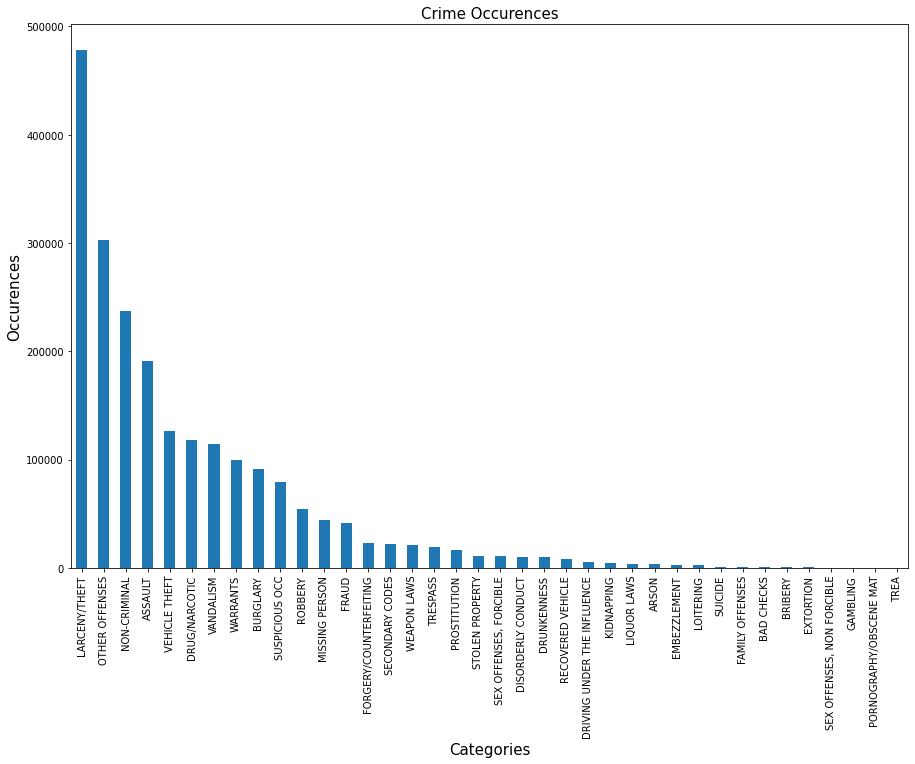

In [12]:
cri_occ.plot(kind='bar', x='Category', y='Occurences', figsize=(15,10), legend=False)

plt.title('Crime Occurences', fontsize=15)
plt.ylabel('Occurences', fontsize=15)
plt.xlabel('Categories', fontsize=15)

plt.show()

### Adding the Year Column

In [13]:
data['Year'] = data['Date'].str.strip().str[-4:]

### Number of Crimes per Year

In [14]:
num_cri_year = data['Year'].value_counts()
print(num_cri_year)

2015    153771
2017    151759
2013    149639
2016    148379
2014    147056
2003    145073
2004    144323
2005    138807
2012    137334
2008    137113
2009    136218
2006    133726
2007    133601
2010    129750
2011    128563
2018     45841
Name: Year, dtype: int64


### Average Number of Crimes per Year

In [15]:
cri_year = list(num_cri_year)
cri_year.pop()

avg_num_cri_year = sum(cri_year)/len(cri_year)
print(avg_num_cri_year)

141007.46666666667


### Focus Crimes

In [16]:
focus_crimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
focus_data = data[['Category', 'Year']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)
focus_data = focus_data.drop(focus_data[focus_data['Year'] == '2018'].index)

### 14 Focus Crimes Bar Plots

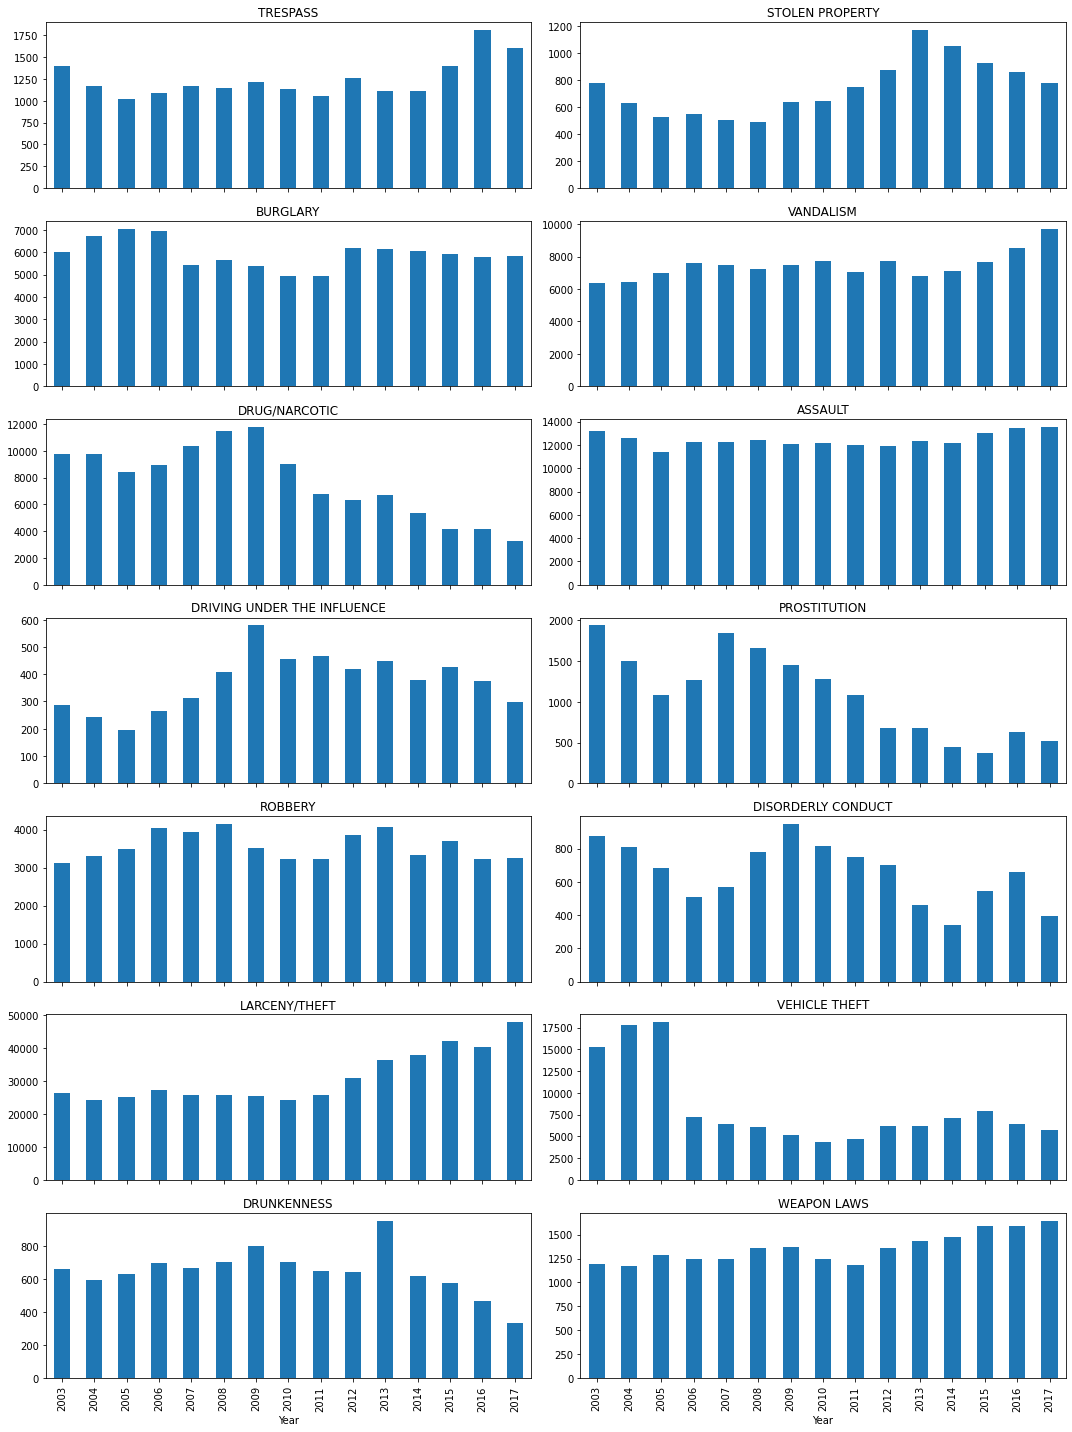

In [17]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)

col = ['Year', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = focus_data[focus_data['Category'] == crime]['Year'].value_counts()
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe = crime_dataframe.sort_values(by=['Year'])
    
    crime_dataframe.plot(kind='bar', x='Year', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)
    
fig.tight_layout()